<a href="https://colab.research.google.com/github/annhater/isdd_projects/blob/main/TP1_MyFirstANN_Anna_PEROVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is an example of NN for classical example of Iris dataset.

# Load necessary libraries

In [ ]:
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# reading/processing data
import pandas as pd
import numpy as np

# machine learning tools
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #neuron type dense
from tensorflow.keras.utils import to_categorical #variables categoriel

# Load data



In [ ]:
iris = load_iris()
X = iris.data              # features (variable explicative)
y = iris.target            # labels (0, 1, 2) (variable à expliquer)

print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


# Explore data

Take a look on data description and answer the following questions:
1. What are the dimensions of our data?
2. How many classes are there? Is the problem balanced or imbalanced?
3. What kind of prediction problem are we dealing with: classification or regression?
4. What loss function should we use with our data?
5. On what sample can we evaluate model performance?
6. What metrics can we calculate for evaluation of model performance?

*The data describes 150 individuals/observations (grouped in 3 species) over 4 descriptors (sepal length, sepal width,petal length and petal width)*

*The dataset consists of **three** species: *setosa*, *versicolor*, and *virginica* - all perfectly balanced (each represents 1/3 of the dataset)*

*Here, we're dealing with **classification problem**. We want to predict the classes (species) of the Iris plant based on the pattern of the numerical descriptors of our data (Iris plants in the training set). The predictive model will analyse the descriptors of each class, and based on the resulting mathematical functions it will be able to predict which species the individual (Iris plant of the test set) is more likely to be part of.*


*Since we're dealing with classification problem, we'll be looking at **cross-entropy loss function**, specifically categorical cross-entropy, where multiple classes are possible. This function is most adapted for classification problems because it measures how close a model’s predictions are to the correct answers. Categorical cross-entropy measures the difference between the true labels and the predicted probabilities, as well as it penalizes the model when it assigns low confidence to the correct class.*

*We should evaluate the model's performance on the **test set**. However, we can implement the validation set as an intermediate dataset, where we can evaluate the performace to check the complexity of our model during the tuning stage (where we improve the performace of the model).*

*To evaluate the model's performance, we will be calculating the **accuracy**, since our dataset is balanced. However, this evaluation metric can be decieving since it ignores the imbalace of classes*

In [ ]:
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = y
rows, columns = df.shape
print(df.shape)
print(df.head())

(150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


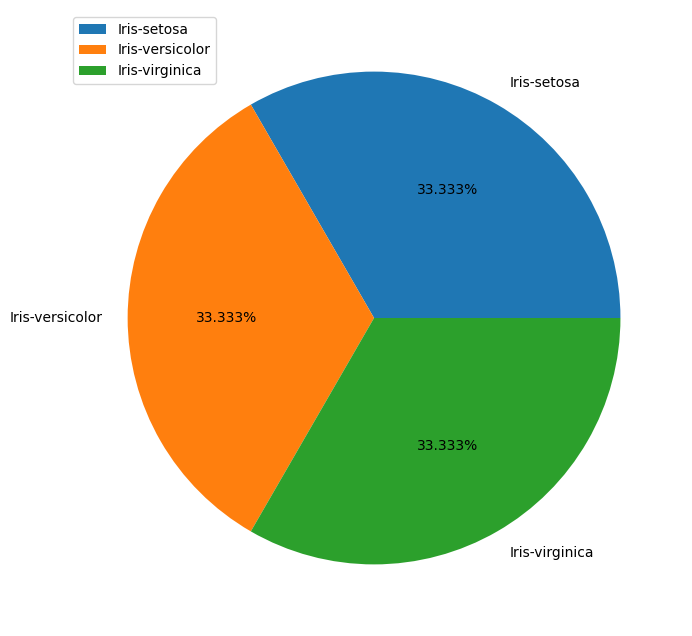

In [ ]:
species_counts = df['species'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(species_counts,labels=['Iris-setosa','Iris-versicolor','Iris-virginica'],autopct='%1.3f%%',explode=[0,0,0])
plt.legend(loc='upper left')
plt.show()

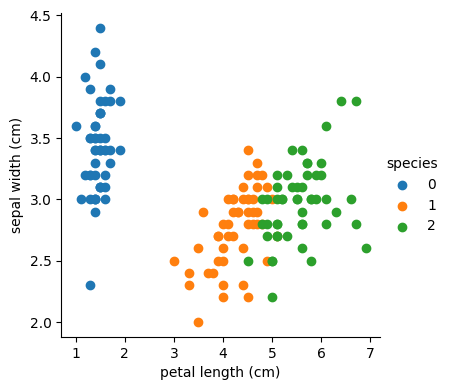

In [ ]:
sns.FacetGrid(df, hue ='species', height = 4).map(plt.scatter,"petal length (cm)","sepal width (cm)").add_legend()
plt.show()

# Prepare data for learning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Describe the test set built in the previous line. What is random_state and why do we need it? Is an independent test set always sufficient to evaluate mode performance?


*We have divided the dataset to train and test with proportion 80/20 accordingly. random_state option act as the random seed setting, that allow us to reproduce the result in the same way no matter how many runs we do.*

*No, with only one test set is not sufficient, because we need to see the reproductibility of our result over different test sets before making any final conclusions about the performance of our model. For that, we need to perform cross-validation.*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

What is the difference between y_train and y_train_cat? How can we convert y_train_cat back to y_train in python?

*Y_train_cat is a categorical transformation of our numerical classes (0,1,2 for the iris species) to_categorical transforms the labels into a binary vector (e.g. 0 becomes [1,0,0]). To transform it back we can use np.argmax that will return the indices of the max element of the array (in a chosen axis, here we have one axis, so axis = 1), and then name the labels with out = names of the labes array*

# Create your network

## Network architecture & hyperparameters

In [ ]:
model = Sequential([
    Dense(100, activation="relu", input_shape=(4,)),
    Dense(50, activation="relu"),
    Dense(3, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,703 (22.28 KB)

 Trainable params: 5,703 (22.28 KB)

 Non-trainable params: 0 (0.00 B)

What are hyperparameters of the model defined above? Are there any other hyperparameters we did not yet define?

*Parameters described above are the 4 parameters describing the individuals of our dataset (sepal length, sepal width,petal length and petal width*

What 153 parameters of the last layer correspond to?

*It corresponds to 50 input parameters of the previous layer multiplied by 3 neurons of the current layer with 3 bias parameters added (one for each neuron of the layer): (50 x 3) + 3 = 153*

## Model training

In [ ]:
history = model.fit(
    X_train,
    y_train_cat,
    validation_split=0.1,
    epochs=50,
    batch_size=8,
    verbose=1
)
#validation_split = 0.1 meaning we take 10% out of the train set to

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.5089 - loss: 1.0687 - val_accuracy: 0.7500 - val_loss: 0.8611
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8282 - loss: 0.8452 - val_accuracy: 0.7500 - val_loss: 0.7065
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8080 - loss: 0.6441 - val_accuracy: 0.7500 - val_loss: 0.5823
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8907 - loss: 0.4534 - val_accuracy: 0.7500 - val_loss: 0.4924
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8784 - loss: 0.4001 - val_accuracy: 0.7500 - val_loss: 0.4344
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8769 - loss: 0.3571 - val_accuracy: 0.7500 - val_loss: 0.3770
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8897 - loss: 0.3058 - val_accuracy: 0.7500 - val_loss: 0.3596
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8634 - loss: 0.2923 - val_accuracy: 0.7500 - v

In [ ]:
print(f"Number of observation in X_train: {len(X_train)-0.1*(len(X_train))}")
print(f"Batch size : 16")
print(f"Number of iterations (X_train/batch size):{(len(X_train)-0.1*(len(X_train)))/16}")

Number of observation in X_train: 108.0
Batch size : 16
Number of iterations (X_train/batch size):6.75


What "14/14" stands for during learning?



*14/14 means number of iterations made during the training of our model. For the output of the code block we only see the results of the last 14th iteration, that includes 50 epochs*

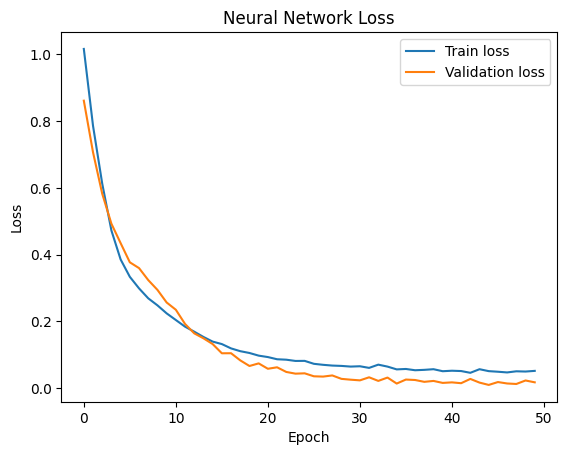

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Neural Network Loss")
plt.show()

According to the loss evolution during iterations, is the number of epochs sufficient for model convergence?

*Yes, it is more than enough. We can even reduce the number of epochs because we observe the convergence up from 20 epochs. We can settle for 30 epochs to produce the most epochs with the sufficien convergence*

Plot evolution of model accuracy using the similar code as above:

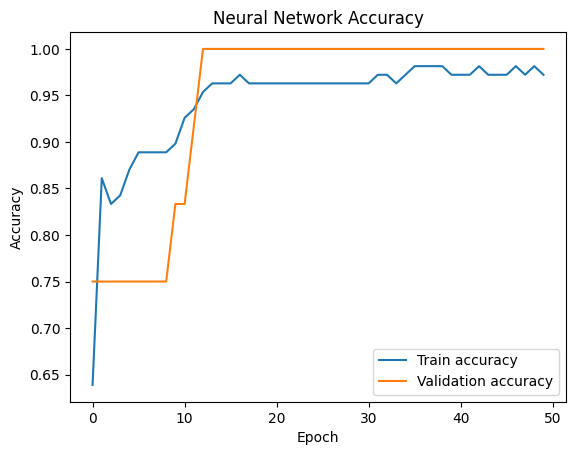

In [ ]:
# enter your code here
plt.figure()
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Neural Network Accuracy")
plt.show()

*We notice the accuracy of the model reach its peak and plateau after ~15 epochs*

## Model performance evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_cat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9333 - loss: 0.1130


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



How do you interpret the resulting confusion matrix?

*The overall accuracy of the model is good: 0.93. The more precise metric F1-score, also shows great results on the validation set: 1.0, 0.9 and 0.9 for each class accordingly. We can say that the model predicts very well.*

*However, knowing the simplicity of out data, we could improve it by reducing the number of layers in the network or by changing other model parameters (epoch number,batch size)*

## Personalize your model

Now, build your own model and try to reduce model size (total number of trainable parameters) achieving similar performance

In [ ]:
# enter your code here : my_model definition

my_model = Sequential([
    Dense(32, activation="relu", input_shape=(4,)),
    Dense(8, activation="relu"),
    Dense(3, activation="softmax")
])

my_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

my_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train new model here
new_history = my_model.fit(
    X_train,
    y_train_cat,
    validation_split=0.1,
    epochs=30,
    batch_size=8,
    verbose=1
)

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.3330 - loss: 1.8277 - val_accuracy: 0.0833 - val_loss: 1.5966
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3380 - loss: 1.2837 - val_accuracy: 0.0833 - val_loss: 1.4983
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3819 - loss: 1.1268 - val_accuracy: 0.0833 - val_loss: 1.1633
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4983 - loss: 0.9943 - val_accuracy: 0.5000 - val_loss: 1.0172
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6906 - loss: 0.9189 - val_accuracy: 0.5833 - val_loss: 0.9788
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6464 - loss: 0.8979 - val_accuracy: 0.5833 - val_loss: 0.9011
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6443 - loss: 0.8211 - val_accuracy: 0.5833 - val_loss: 0.8549
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6448 - loss: 0.7883 - val_accuracy: 0.5833 - v

In [ ]:
# evaluate your model performance here
loss, accuracy = my_model.evaluate(X_test, y_test_cat)
y_pred_prob = my_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.3094


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



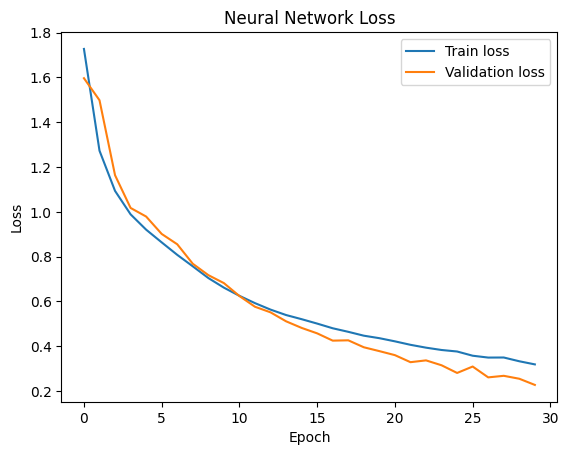

In [ ]:
# plot
plt.figure()
plt.plot(new_history.history["loss"], label="Train loss")
plt.plot(new_history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Neural Network Loss")
plt.show()

*After reducing the number of neurons inside our multi-layered model and changing the number of epochs set, we've achieved even more accurate model (accuracy = 1.0), with less computing necessary.*


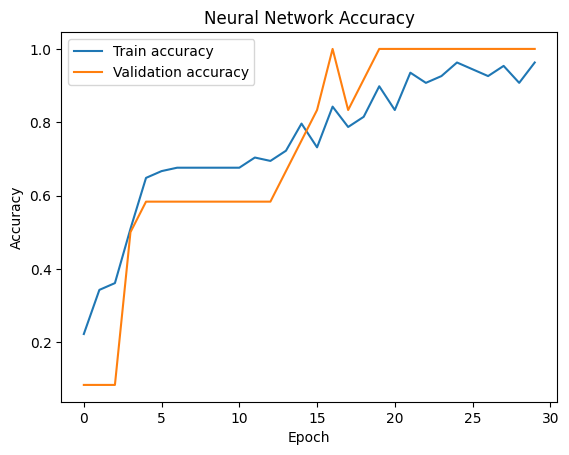

In [ ]:
plt.figure()
plt.plot(new_history.history["accuracy"], label="Train accuracy")
plt.plot(new_history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Neural Network Accuracy")
plt.show()

*Our new updated model reaches the best accuracy after 20 epochs, meaning it needs more epochs to learn (logical, since we reduced significalntly the number of neurons)*

# Logistic regression for the same problem
Here we will compare model performance for a baseling predictive model: logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=200
)

logreg.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [ ]:
y_pred_lr = logreg.predict(X_test)

from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression accuracy: {acc_lr:.3f}")

Logistic Regression accuracy: 0.967


In [ ]:
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=iris.target_names))

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



What model would you choose among ANN built above and Logistic Regression? Why?

*Seeing the good performance of our logistic regression model (accuracy = 0.97, f1 score = 1.0/0.95/0.95 for each class). For a simple problem like this, there is no need for a complicated artificial neural network, especially since its more prone to overfitting the dataset. The simple logistic regression model allows us to explain out parameters using only one sigmoidal function.*

*For more complicated datasets of course, ANN prove to be very robust; in our case however, the simpler the better.*

# Advanced : compare decision boundaries for 2D problem

## Function to plot decision boundaries

In [ ]:
# Mean values for dimensions 3 and 4 (used for visualization)
fixed_features = X_train.mean(axis=0)

def plot_decision_boundary_fullX(
    model,
    X,
    y,
    fixed_features,
    feature_indices=(0, 1),
    is_nn=False,
    title=""
):
    i, j = feature_indices

    x_min, x_max = X[:, i].min() - 1, X[:, i].max() + 1
    y_min, y_max = X[:, j].min() - 1, X[:, j].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Build full-dimensional input
    X_grid = np.tile(fixed_features, (xx.size, 1))
    X_grid[:, i] = xx.ravel()
    X_grid[:, j] = yy.ravel()

    # Prediction
    if is_nn:
        probs = model.predict(X_grid, verbose=0)
        Z = np.argmax(probs, axis=1)
    else:
        Z = model.predict(X_grid)

    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, i], X[:, j], c=y, edgecolor="k")
    plt.xlabel(iris.feature_names[i])
    plt.ylabel(iris.feature_names[j])
    plt.title(title)
    plt.show()


## Decision boundaries ANN vs Logistic Regression

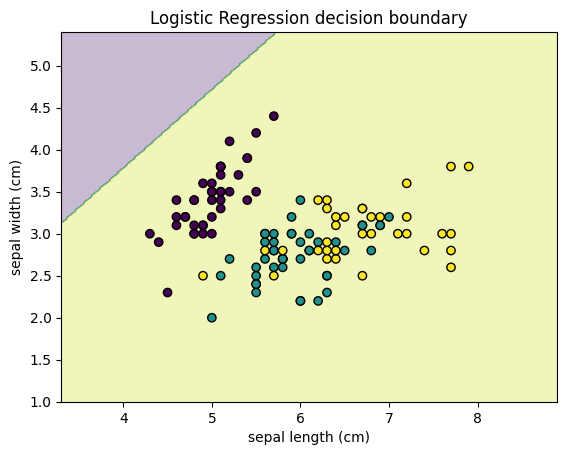

In [ ]:
plot_decision_boundary_fullX(
    model=logreg,
    X=X_train,
    y=y_train,
    fixed_features=fixed_features,
    feature_indices=(0, 1),
    title="Logistic Regression decision boundary"
)

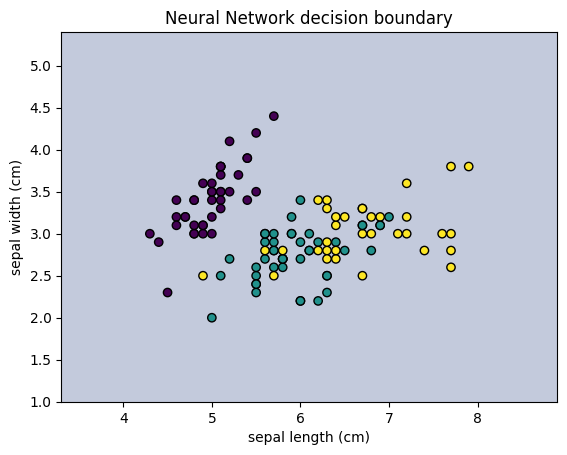

In [ ]:
plot_decision_boundary_fullX(
    model=model,
    X=X_train,
    y=y_train,
    fixed_features=fixed_features,
    feature_indices=(0, 1),
    is_nn=True,
    title="Neural Network decision boundary"
)

*Here, we compare decidion boundaries for the ANN model and logistic regression. For Logistic regression decision boundary we ne a purple corner that should be a divising line between one of the other classes.*

*In the decision boundary representation for NN model, we don't see this line/corner. This could mean, that the the decision boundary exists outside of the represented axes.*

*The way decision boundary is represented here is based on the assumption that petal descriptors are fixed at their mean value(fixed_features = X_train.mean(axis=0))*

*This means when we plot the Sepal dimensions boundary,Petal Length and Petal Width are constant, which makes our representation fail to show the real 4D separation. We could reduce the dimensions using MDS, to properly show the decision boundaries of the two studied models.*